<a href="https://colab.research.google.com/github/gayathrirx/genAI_handson/blob/main/Hands_on_with_Generative_AI_Demo_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-On with Generative AI

This notebook demostrates how to generate text and images from input prompts. We show how to perform both tasks by calling APIs and with open models that we run locally in this notebook.

Before getting into the examples we will install some packages that we will need.

In [ ]:
# Install packages that we will use
!pip install openai
!pip install accelerate
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.5/327.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 7.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (

---

## Use large language models to generate text

In [ ]:
# Import packages that you will use for accessing the OpenAI API
import json
from google.colab import drive
from openai import OpenAI

You will need an API key to access the [OpenAI API](https://openai.com/index/openai-api). Here we load our API key from a file on Google drive. We do this to avoid hardcoding our personal API key in this notebook, which would make it visible to anyone who uses the notebook.

Our API key is in a file containing a JSON object of the form
```
{
  "api_key": "<MY_API_KEY>"
}
```

In [ ]:
# Mount Google Drive.
# We will get our OpenAI API key from a file that we stored in Google Drive.
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Read in API key
with open("/content/gdrive/MyDrive/OpenAI/keys.json", "r") as f:
  api_key = json.loads(f.read())["api_key"]

We will use the OpenAI API to generate a response from an input prompt. To call the API, we will create an OpenAI client object. We can later use this same client object to generate images using the DALL-E model.

In [ ]:
# Create an OpenAI client
client = OpenAI(api_key=api_key)

We can now generate text from a given prompt using a single API call. Here we pass the prompt "do snakes have ears?", then use GPT-3.5 to generate a response.

In [ ]:
[
    {'role': 'system', 'content': 'do snakes have ears?'},
    {'role': 'user', 'content': 'do snakes have ears?'},
    {'role': 'assistant', 'content': 'No, snakes do not have external ears like mammals do. Instead, they have inner ears that are responsible for sensing vibrations and sound waves. This allows them to hear low-frequency sounds and detect movements in their environment.'},
    {'role': 'user', 'content': 'XXXX'}
]

In [ ]:
# Generating responsefrom gpt-3.5-turbo
openai_response = client.chat.completions.create(
    model = 'gpt-3.5-turbo',
    messages = [{'role': 'user', 'content': 'do snakes have ears?'}]
)

# Print the response
openai_response.choices[0].message.content

'No, snakes do not have external ears like mammals do. Instead, they have inner ears that are responsible for sensing vibrations and sound waves. This allows them to hear low-frequency sounds and detect movements in their environment.'

In [ ]:
openai_response.choices[0].message

ChatCompletionMessage(content='No, snakes do not have external ears like mammals do. Instead, they have inner ears that are responsible for sensing vibrations and sound waves. This allows them to hear low-frequency sounds and detect movements in their environment.', role='assistant', function_call=None, tool_calls=None)

---
Now we will download a model to this notebook and generate a response locally from this model. We will use the Hugging Face Transformers package to accomplish this. There are various open models we can use with Transformers. We will use Microsoft's Phi-3-mini model, which is a relatively small (3.8 billion parameters) but capable model.

In [ ]:
# Import the Transformers package
from transformers import AutoModelForCausalLM, AutoTokenizer

We will need a tokenizer to convert our text input into a sequence of tokens and a model to generate a response from the provided context tokens.

In [ ]:
# Load the model and tokenizer
model = AutoModelForCausalLM.from_pretrained("microsoft/Phi-3-mini-4k-instruct",
                                             device_map="cuda",
                                             torch_dtype="auto",
                                             trust_remote_code=True
                                             )
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

configuration_phi3.py:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py:   0%|          | 0.00/73.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


We will evaluate the same prompt as above ("do snakes have ears?") with the Phi-3-mini model. We will first convert our prompt to tokens, generate the output tokens, then convert back to text to view the output.

In [ ]:
# Tokenize the input context
messages = [{"role": "user", "content": "do snakes have ears?"}]
inputs = tokenizer.apply_chat_template(messages, add_generation_prompt=True, return_tensors="pt")

In [ ]:
tokenizer.encode("Generative")

[3251, 1230]

In [ ]:
tokenizer.decode(3251)

'Gener'

In [ ]:
inputs[0]

tensor([    1, 32010,   437,  5807,  6926,   505, 22827, 29973, 32007, 32001])

In [ ]:
result = model(inputs.to("cuda"))

In [ ]:
# Pass the context to the model and generate an output
outputs = model.generate(inputs.to("cuda"), max_new_tokens=128)

In [ ]:
for token in outputs[0]:
  print(token, tokenizer.decode(token))

tensor(32010, device='cuda:0') <|user|>
tensor(437, device='cuda:0') do
tensor(5807, device='cuda:0') sn
tensor(6926, device='cuda:0') akes
tensor(505, device='cuda:0') have
tensor(22827, device='cuda:0') ears
tensor(29973, device='cuda:0') ?
tensor(32007, device='cuda:0') <|end|>
tensor(32001, device='cuda:0') <|assistant|>
tensor(22639, device='cuda:0') Sn
tensor(6926, device='cuda:0') akes
tensor(437, device='cuda:0') do
tensor(451, device='cuda:0') not
tensor(505, device='cuda:0') have
tensor(7029, device='cuda:0') external
tensor(22827, device='cuda:0') ears
tensor(763, device='cuda:0') like
tensor(286, device='cuda:0') m
tensor(4850, device='cuda:0') amm
tensor(1338, device='cuda:0') als
tensor(437, device='cuda:0') do
tensor(29889, device='cuda:0') .
tensor(2398, device='cuda:0') However
tensor(29892, device='cuda:0') ,
tensor(896, device='cuda:0') they
tensor(437, device='cuda:0') do
tensor(505, device='cuda:0') have
tensor(6426, device='cuda:0') inner
tensor(2326, device='cuda

In [ ]:
text = tokenizer.batch_decode(outputs)[0]
text

'<s><|user|> do snakes have ears?<|end|><|assistant|> Snakes do not have external ears like mammals do. However, they do have inner ear structures that allow them to sense vibrations and changes in air pressure. These vibrations can be crucial for their survival, as they help snakes detect prey and predators. The inner ear of a snake contains a structure called the columella, which is similar to the mammalian eardrum and is sensitive to vibrations.<|end|>'

---

## Use diffusion models to generate images

We can now generate an image from given prompt using a single API call. We will use the same OpenAI API client that we opened before to call OpenAI's DALL-E model. Here we pass the prompt "a realistic photograph of a snake with ears", then use DALL-E 3 to generate an image.

In [ ]:
# Use the OpenAI API to generate an Image from DALL-E
response = client.images.generate(
  model="dall-e-3",
  prompt="a realistic photograph of a snake with ears",
  size="1024x1024",
  quality="standard",
  n=1,
)

image_url = response.data[0].url

In [ ]:
image_url

'https://oaidalleapiprodscus.blob.core.windows.net/private/org-psRR4CjIDQEBzzIuMmeoxXkG/user-00N9WY2YiYYqgX3n6qrH9SNs/img-oX1a5azphdRrHtDv5w12WzBI.png?st=2024-05-18T19%3A09%3A01Z&se=2024-05-18T21%3A09%3A01Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-05-18T17%3A06%3A19Z&ske=2024-05-19T17%3A06%3A19Z&sks=b&skv=2021-08-06&sig=Qc/lkDLCf3/smaSXlrRG8hWYzOtxzdAzMok3Q9adJ9E%3D'

The DALL-E API generates an image, then provides a URL that can be used to access the image. We pull the image data from this URL below, then display in the notebook.

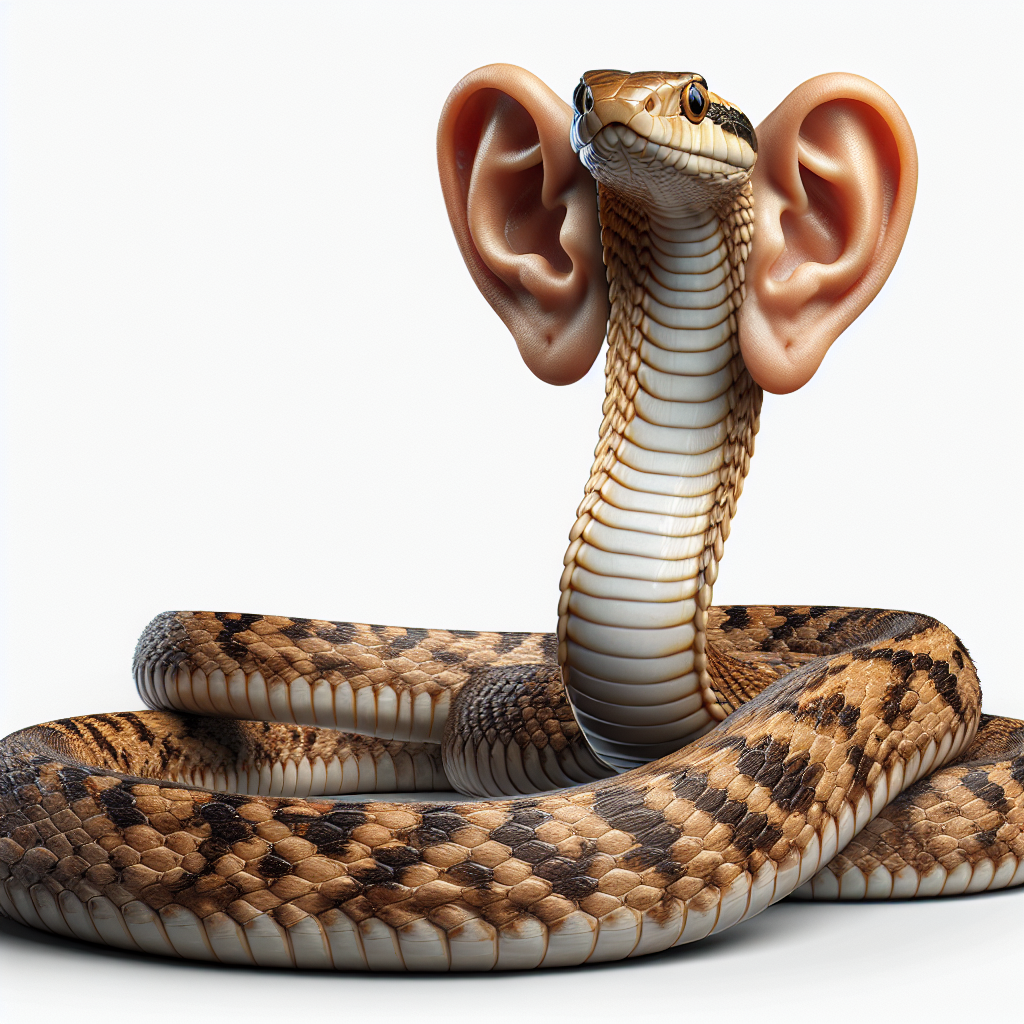

In [ ]:
# Import packages for displaying the generated image
import urllib.request
from io import BytesIO
from PIL import Image

# Load and display the image
with urllib.request.urlopen(image_url) as url:
    img = Image.open(BytesIO(url.read()))
display(img.resize((500, 500)))
#display(img)

---

Now we will download a model to this notebook and generate an image locally from this model. We will use the Hugging Face Diffusers package to accomplish this. There are various open models we can use with Diffusers. We will use Stability AI's Stable Diffusion XL model for this.

The free Colab T4 instance might run out of GPU memory if we run the code below after running the language model. You can restart the runtime before running the code below to free up the GPU memory.

In [ ]:
# Check on GPU memory usage
!nvidia-smi

Sat May 18 20:17:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Import the Diffusers package
from diffusers import DiffusionPipeline
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Below we load the Stable Diffusion XL model into a pipeline that combines all of the components used to generate an image (e.g., a text encoder, a text-conditioned U-Net, a scheduler, and a variational autoencoder).

In [ ]:
# Load the Stable Diffusion XL model
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
)
pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.27.2",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

Now that our model pipeline is loaded, we will pass the same prompt that we provided to DALL-E above ("a realistic photograph of a snake with ears") to Stable DIffusion XL.

  0%|          | 0/50 [00:00<?, ?it/s]

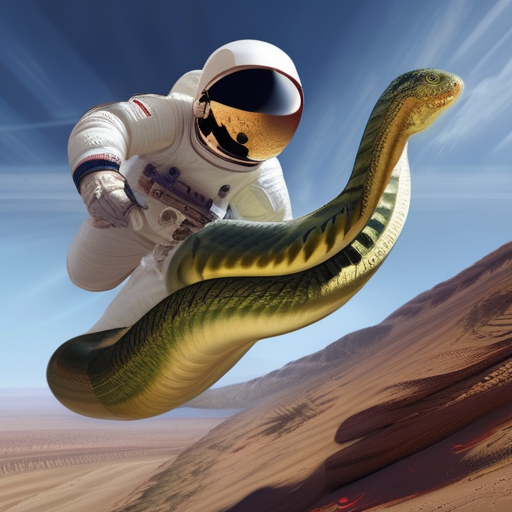

In [ ]:
# Generate an image from a prompt
prompt = "a realistic photograph of an astronaut riding a snake"
image = pipe(prompt=prompt, width=512, height=512, num_inference_steps=50).images[0]
image

In [ ]:
pipe

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.27.2",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}